In [1]:
#Illustrating the Deutsch Josza Algorithm

In [37]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random,time
import numpy as np

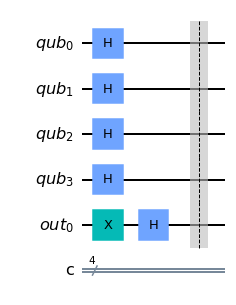

In [49]:
n = 4
qub = QuantumRegister(n, name = 'qub')
out = QuantumRegister(1, name = 'out')
c = ClassicalRegister(n, name = 'c')
circ = QuantumCircuit(qub,out,c)
circ.x(out)

for i in range(n):
    circ.h(qub[i])
circ.h(out)
circ.barrier()
circ.draw(output = 'mpl')

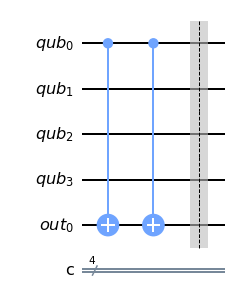

In [50]:
#oracle (first for the case of constant output)

# How to create that? Such that out xor f(qub[i]) = 0/1 for all the inputs

circ_oracle = QuantumCircuit(qub,out,c)
circ_oracle.cx(qub[0],out)
circ_oracle.cx(qub[0],out)
circ_oracle.barrier()
circ_oracle.draw(output = 'mpl')

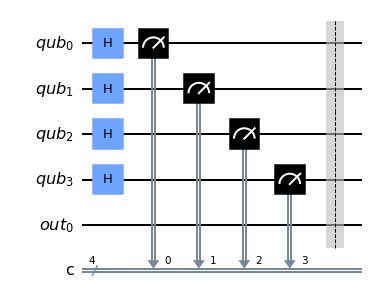

In [51]:
# output circuit with n hadamard gates

circ_out = QuantumCircuit(qub,out,c)
for i in range(n):
    circ_out.h(qub[i])

circ_out.measure(qub,c)
circ_out.barrier()
circ_out.draw(output = 'mpl')

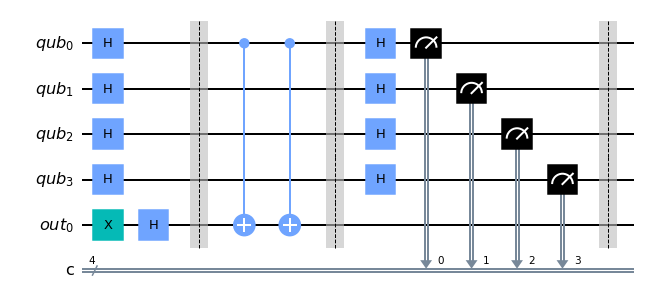

In [52]:
#final circuit

circ_final = circ + circ_oracle + circ_out
circ_final.draw(output = 'mpl')

In [53]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_final,backend,shots=100)
counts = job.result().get_counts(circ_final)
print(counts)

{'0000': 100}


In [54]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
# We choose the least busy device
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits >= n+1)) 
print("We are using...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
# We send both circuits at a time
job_exp = execute(circ_final, backend=backend, shots = 100)
job_monitor(job_exp)


ibmqfactory.load_account:WARNING:2021-07-03 01:29:30,330: Credentials are already in use. The existing account in the session will be replaced.


We are using... ibmq_quito
It has 0 pending jobs
Job Status: job has successfully run


{'0000': 93, '0001': 3, '0010': 1, '0011': 1, '0100': 2}


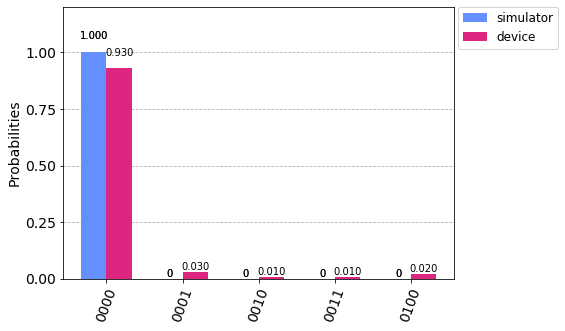

In [55]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ_final)
print(counts_exp)
plot_histogram([counts,counts_exp], legend = ['simulator','device'])